In [1]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt 
%matplotlib inline 

In [3]:
df=pd.read_csv(r"C:\Users\rauna\Desktop\homeprices_banglore.csv")
df.sample(5)

,area,bedrooms,price
4,1200,2,51.00
6,2732,4,135.00
9,3700,5,167.00
18,2770,3,102.00
0,1056,2,39.07


In [4]:
#perform scaling 
#implement batch gradient descent

from sklearn import preprocessing 

sx=preprocessing.MinMaxScaler()
sy=preprocessing.MinMaxScaler()

scaled_X=sx.fit_transform(df.drop('price',axis='columns'))
scaled_X

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [6]:
scaled_y=sy.fit_transform(df['price'].values.reshape(df.shape[0],1))
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [11]:
#batch gradient descent 
def batch_gradient_descent(X,y_true,epochs,learning_rate=0.01):
    
    number_of_features=X.shape[1]
    
    w=np.ones(shape=(number_of_features))
    b=0
    total_samples=X.shape[0]
    
    cost_list = []
    epoch_list= []
    
    for i in range(epochs):
        
        y_predicted=np.dot(w,scaled_X.T)+b #w1*area +w2*bedroom   
        
        w_grad=-(2/total_samples)*(X.T.dot(y_true-y_predicted))
        b_grad=-(2/total_samples)*np.sum(y_true-y_predicted)
        
        w=w-learning_rate*w_grad
        b=b-learning_rate*b_grad
        
        cost=np.mean(np.square(y_true-y_predicted))
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
    return w,b,cost,cost_list,epoch_list

w,b,cost,cost_list,epoch_list=batch_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),500)
w,b,cost


            

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

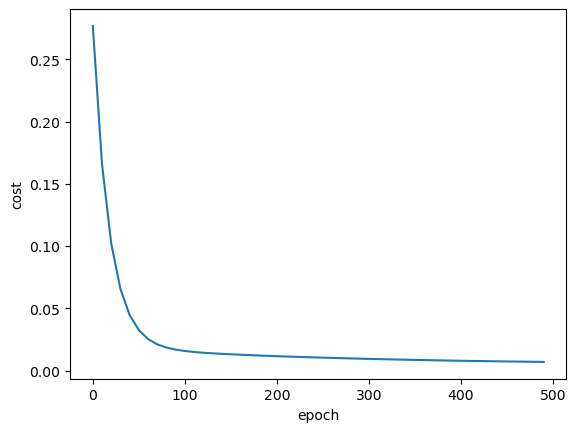

In [12]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

In [17]:
def predict(area,bedroom,w,b):
    scaled_X=sx.transform([[area,bedroom]])[0]
    
    scaled_price=w[0]*scaled_X[0]+w[1]*scaled_X[1]+b
    return sy.inverse_transform([[scaled_price]])[0][0]

# Predict
predicted_price = predict(2600, 4, w, b)
print(predicted_price)

128.45484403267596


C:\Users\rauna\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [22]:
import random

In [24]:
#stochastic gradient descent 
def stochastic_gradient_descent(X,y_true,epochs,learning_rate=0.01):
    
    number_of_features=X.shape[1]
    
    w=np.ones(shape=(number_of_features))
    b=0
    total_samples=X.shape[0]
    
    cost_list = []
    epoch_list= []
    
    for i in range(epochs):
        random_index=random.randint(0,total_samples-1)
        sample_x=X[random_index]
        sample_y=y_true[random_index]
        y_predicted=np.dot(w,sample_x.T)+b
        
        w_grad=-(2/total_samples)*(X.T.dot(y_true-y_predicted))
        b_grad=-(2/total_samples)*np.sum(y_true-y_predicted)
        
                
        w=w-learning_rate*w_grad
        b=b-learning_rate*b_grad
        
        cost=np.mean(np.square(y_true-y_predicted))
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
    return w,b,cost,cost_list,epoch_list
        
w_sgd,b_sgd,cost_sgd,cost_list_sgd,epoch_list_sgd=stochastic_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),500)
w_sgd,b_sgd,cost_sgd      
        
        

(array([1.61572549, 1.2887479 ]), -0.814404040213073, 1.6286065905833342)